In [1]:
!pip install pyportfolioopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 782.3 kB/s eta 0:00:00


In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import pypfopt as ppf

from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

import matplotlib.pyplot as plt

In [3]:
def fetch_stock_data(tickers, start_date, end_date):
    # Download stock data
    stock_data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return stock_data


In [37]:
tickers = "TSLA GOOG ESTC BAC SBUX KO DIS"
start_date = "2021-01-01"
end_date = "2024-01-19"
stock_data = fetch_stock_data(tickers, start_date, end_date)
market_data = fetch_stock_data('SPY', start_date, end_date).to_frame()
stock_data
market_data

[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2021-01-04,352.767151
2021-01-05,355.196716
2021-01-06,357.320374
2021-01-07,362.629181
2021-01-08,364.695343
...,...
2024-01-11,476.350006
2024-01-12,476.679993
2024-01-16,474.929993


In [39]:
# Calculate expected returns and sample covariance
# mu = expected_returns.mean_historical_return(prices=stock_data)
# mu = expected_returns.ema_historical_return(prices=stock_data)
mu = expected_returns.capm_return(prices=stock_data, market_prices=market_data, risk_free_rate=0.05)
mu

BAC     0.103978
DIS     0.109598
ESTC    0.158106
GOOG    0.122659
KO      0.075590
SBUX    0.105689
TSLA    0.151813
Name: mkt, dtype: float64

In [44]:
# Sigma = risk_models.risk_matrix(stock_data, method="sample_cov")
Sigma = risk_models.risk_matrix(stock_data, method="ledoit_wolf")

Sigma

,BAC,DIS,ESTC,GOOG,KO,SBUX,TSLA
BAC,0.081888,0.041142,0.039463,0.028911,0.013437,0.030214,0.046711
DIS,0.041142,0.090623,0.070561,0.040995,0.013527,0.038637,0.060894
ESTC,0.039463,0.070561,0.394416,0.089816,0.009777,0.061785,0.155146
GOOG,0.028911,0.040995,0.089816,0.100485,0.013594,0.036583,0.076104
KO,0.013437,0.013527,0.009777,0.013594,0.028574,0.015802,0.010030
SBUX,0.030214,0.038637,0.061785,0.036583,0.015802,0.077322,0.055414
TSLA,0.046711,0.060894,0.155146,0.076104,0.010030,0.055414,0.339016


In [27]:
stock_data.corr()

,BAC,DIS,ESTC,GOOG,KO,SBUX,TSLA
BAC,1.000000,0.654431,0.529517,0.429771,-0.301021,0.226967,0.495888
DIS,0.654431,1.000000,0.836526,0.191279,-0.803322,0.452037,0.280108
ESTC,0.529517,0.836526,1.000000,0.432952,-0.782403,0.475602,0.414026
GOOG,0.429771,0.191279,0.432952,1.000000,-0.055500,0.218684,0.577423
KO,-0.301021,-0.803322,-0.782403,-0.055500,1.000000,-0.419373,-0.154351
SBUX,0.226967,0.452037,0.475602,0.218684,-0.419373,1.000000,-0.170048
TSLA,0.495888,0.280108,0.414026,0.577423,-0.154351,-0.170048,1.000000


In [45]:
### Compute Minimum Variance Portfolio using PyPortfolioOpt
# Create an EfficientFrontier object
ef = EfficientFrontier(mu, Sigma)
# Calculate the minimum volatility portfolio weights
raw_weights = ef.min_volatility()
raw_weights

OrderedDict([('BAC', 0.1032316958614156),
             ('DIS', 0.0550765167320027),
             ('ESTC', 0.0),
             ('GOOG', 0.0687799131361842),
             ('KO', 0.7032526402005207),
             ('SBUX', 0.0696592340698768),
             ('TSLA', 0.0)])

In [46]:
cleaned_weights = ef.clean_weights()
cleaned_weights

OrderedDict([('BAC', 0.10323),
             ('DIS', 0.05508),
             ('ESTC', 0.0),
             ('GOOG', 0.06878),
             ('KO', 0.70325),
             ('SBUX', 0.06966),
             ('TSLA', 0.0)])

In [47]:
ef.portfolio_performance(verbose=True)

Expected annual return: 8.6%
Annual volatility: 15.6%
Sharpe Ratio: 0.42


(0.0857277932941247, 0.1557641896382926, 0.4219698599964106)

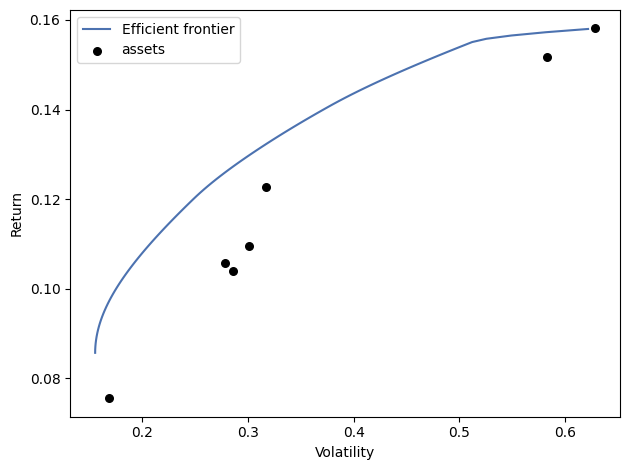

In [48]:
### Plot the Efficient Frontier (Bugfix)
### Change plt.style.use("seaborn-deep") to plt.style.use("seaborn-v0_8-deep") at line 21 of plotting.py
### You can find plotting.py in "~/venv/yourenvname/lib/python3.10/site-packages/pypfopt"

import matplotlib.pyplot as plt
from pypfopt import plotting

ef = EfficientFrontier(mu, Sigma)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

0 BAC
1 DIS
2 ESTC
3 GOOG
4 KO
5 SBUX
6 TSLA


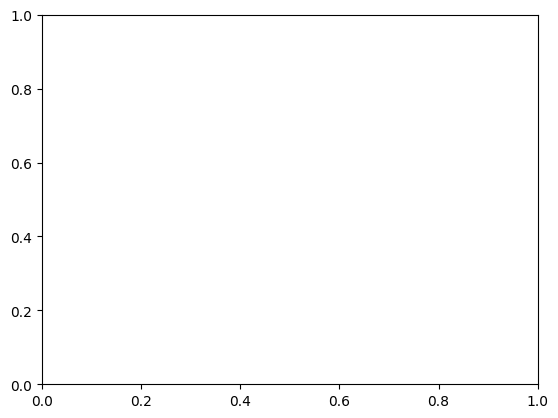

In [29]:
# Plot the efficient frontier with asset labels
fig, ax = plt.subplots()
# plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# Annotate each point with the asset labels
for i, txt in enumerate(ef.tickers):
    print(i, txt)
    # ax.annotate(txt, (ef.weights[i], ef.portfolio_performance()[0][i]))

plt.show()